# Sobreajuste e early stopping

O "early stopping" (ou parada antecipada) é uma técnica de regularização utilizada em treinamento de redes neurais para evitar o sobreajuste e encontrar um ponto ótimo de convergência durante o treinamento. A ideia fundamental por trás do early stopping é interromper o treinamento do modelo assim que o desempenho em um conjunto de validação começa a piorar, em vez de continuar até que o modelo se ajuste demais aos dados de treinamento. O early stopping funciona da seguinte forma:

1. **Conjunto de Treinamento e Conjunto de Validação**: Durante o treinamento de uma rede neural, geralmente divide-se o conjunto de dados em dois subconjuntos: um conjunto de treinamento usado para atualizar os pesos do modelo e um conjunto de validação usado para avaliar o desempenho do modelo em dados não vistos durante o treinamento.

2. **Monitoramento de Métricas**: À medida que o treinamento progride, as métricas de desempenho, como erro ou precisão, são calculadas regularmente no conjunto de validação. Essas métricas fornecem uma indicação de quão bem o modelo está generalizando para novos dados.

3. **Critério de Parada**: O critério de parada é uma métrica escolhida com base no problema e nas metas do treinamento. Pode ser o erro de validação, a precisão ou qualquer outra métrica relevante. O treinamento é interrompido quando a métrica de validação não melhora mais ou começa a piorar.

4. **Recuperação do Melhor Modelo**: Ao interromper o treinamento, o modelo é revertido para o ponto em que obteve o melhor desempenho no conjunto de validação. Esse modelo é então usado para inferência e avaliação em novos dados.

Os benefícios do early stopping incluem:

- Evita o sobreajuste: Ao interromper o treinamento antes que o modelo se ajuste demais aos dados de treinamento, o early stopping ajuda a obter modelos mais generalizados e melhores em dados de teste não vistos.

- Economiza tempo e recursos computacionais: O treinamento de redes neurais pode ser computacionalmente intensivo, e o early stopping pode ajudar a economizar tempo e recursos interrompendo o treinamento assim que não houver mais ganho significativo no desempenho.

- Melhora a robustez: Modelos treinados com early stopping tendem a ser mais robustos e menos sensíveis a variações nos dados de treinamento.

## Baixando e normalizando os dados.

Utilizaremos a base de dados conhecida como CIFAR10. Ela possui 60.000 imagens **coloridas** com dimensão $32 \times 32 \times 3$, ou seja, elas têm 3 dimensões (ou canais), uma para cada uma das três cores, RGB (vermelho, verde e azul).

Usaremos 50.000 imagens para treinamento e 10.000 imagens para validação. As imagens pertencem a 10 classes, as quais são listadas abaixo.

| Rótulo |  Descrição |
|:------:|:----------:|
|    0   |  airplane  |
|    1   | automobile |
|    2   |    bird    |
|    3   |     cat    |
|    4   |    deer    |
|    5   |     dog    |
|    6   |    frog    |
|    7   |    horse   |
|    8   |    ship    |
|    9   |    truck   |


In [12]:
# TensorFlow
import tensorflow as tf

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Reshaping the label arrays.
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

# Defining the class names.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Scaling.
train_images = train_images / 255.0
test_images = test_images / 255.0

## Criando, configurando e treinando uma rede neural convolucional

In [13]:
# Define VGG model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the VGG model.
history = model.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=100)

Epoch 1/100
782/782 [==============================] - 11s 10ms/step - loss: 1.4987 - accuracy: 0.4475 - val_loss: 1.1517 - val_accuracy: 0.5898
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 0.9727 - accuracy: 0.6555 - val_loss: 0.9845 - val_accuracy: 0.6642
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 0.7526 - accuracy: 0.7346 - val_loss: 0.7916 - val_accuracy: 0.7284
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 0.6087 - accuracy: 0.7855 - val_loss: 0.7718 - val_accuracy: 0.7492
Epoch 5/100
782/782 [==============================] - 7s 9ms/step - loss: 0.4915 - accuracy: 0.8290 - val_loss: 0.8598 - val_accuracy: 0.7213
Epoch 6/100
782/782 [==============================] - 7s 9ms/step - loss: 0.3870 - accuracy: 0.8629 - val_loss: 0.8242 - val_accuracy: 0.7448
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 0.3039 - accuracy: 0.8917 - val_loss: 0.7970 - val_accuracy: 0.76

## Plotando os erros e acurácias de treinamento e validação em função das épocas de treinamento.


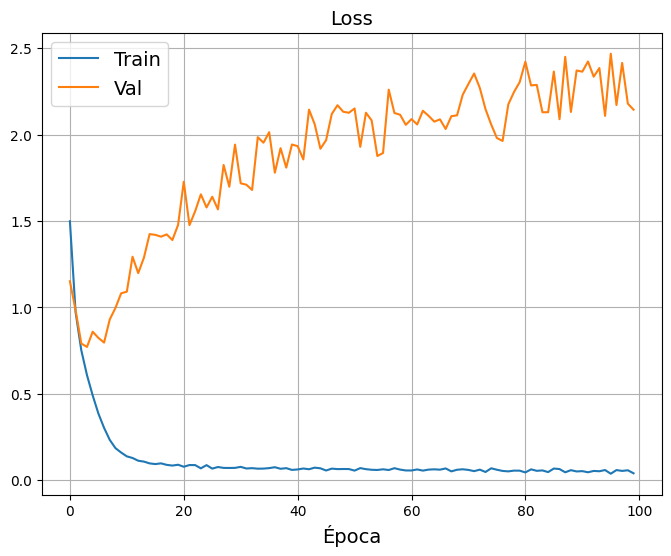

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Loss', fontsize=14)
plt.grid()
plt.show()

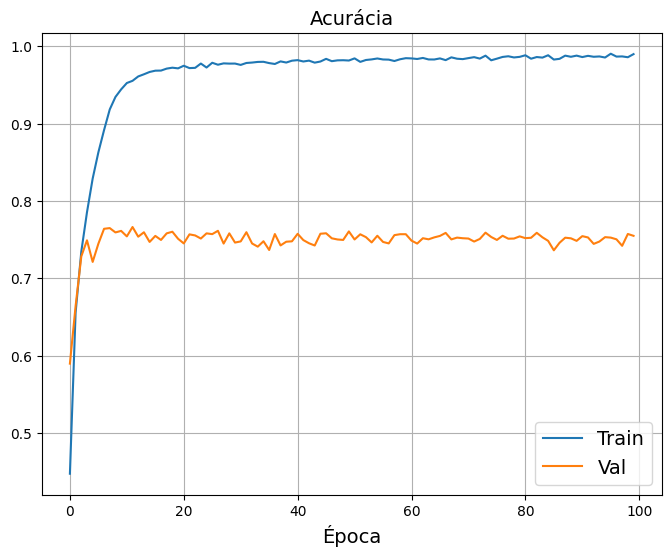

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Acurácia', fontsize=14)
plt.grid()
plt.show()

## Aplicando o early-stop.

In [16]:
# Define VGG model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

# Train the VGG model.
history = model.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
782/782 [==============================] - 12s 10ms/step - loss: 1.5074 - accuracy: 0.4438 - val_loss: 1.1603 - val_accuracy: 0.5899
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 0.9709 - accuracy: 0.6557 - val_loss: 0.8400 - val_accuracy: 0.7038
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 0.7592 - accuracy: 0.7326 - val_loss: 0.7454 - val_accuracy: 0.7406
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 0.6123 - accuracy: 0.7848 - val_loss: 0.7551 - val_accuracy: 0.7460
Epoch 5/100
782/782 [==============================] - 7s 9ms/step - loss: 0.4978 - accuracy: 0.8248 - val_loss: 0.7213 - val_accuracy: 0.7553
Epoch 6/100
782/782 [==============================] - 7s 9ms/step - loss: 0.3990 - accuracy: 0.8591 - val_loss: 0.7465 - val_accuracy: 0.7652
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 0.3100 - accuracy: 0.8894 - val_loss: 0.8248 - val_accuracy: 0.7

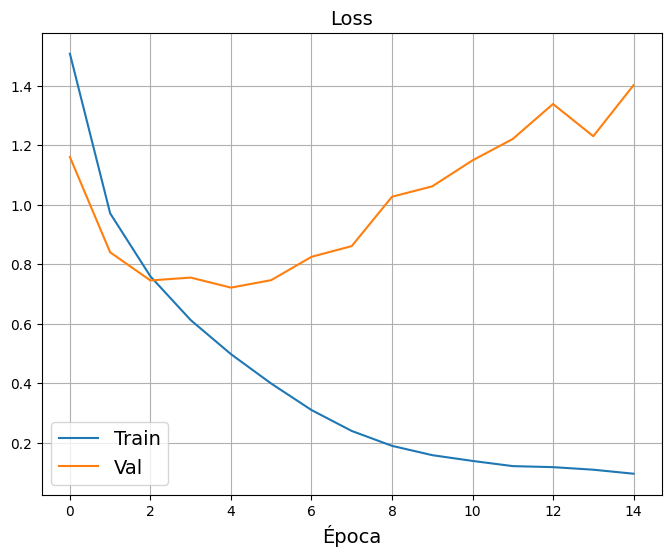

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Loss', fontsize=14)
plt.grid()
plt.show()

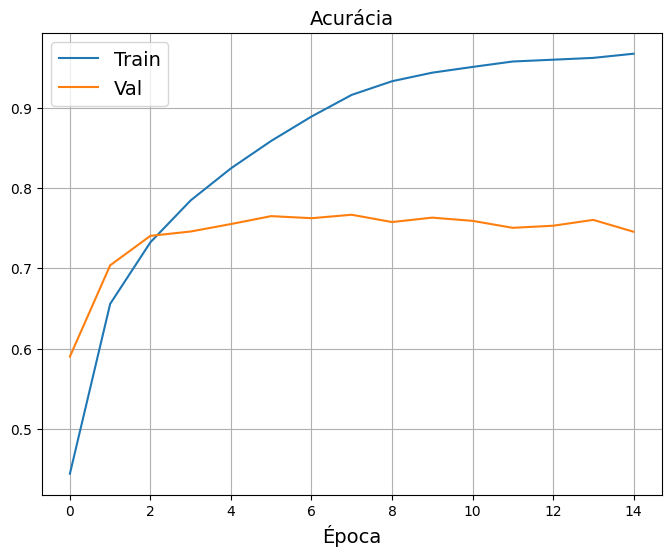

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Acurácia', fontsize=14)
plt.grid()
plt.show()